In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import datetime
import pytz
import uproot 
import numpy.ma as ma
import scipy.optimize as scipy
import math
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.path import Path
import pickle
import pickletools
import datetime
import pytz

In [2]:
# load general data
unsalted = uproot.open('/global/homes/k/kwild/ALPACA/run/SR3RunsAnalysis/SR3-WSv8_LZAP-5.5.3_unsalted.files.root')
salted = uproot.open('/global/homes/k/kwild/ALPACA/run/SR3RunsAnalysis/SR3-WSv8_LZAP-5.5.3_salted.files.root')
data = uproot.open('/global/homes/k/kwild/ALPACA/run/SR3RunsAnalysis/SR3-WSv8_LZAP-5.5.3_files.root')

# get keys
data.keys()

['SS;1']

In [3]:
# select the tree of interest from the file, in this case single scatter events, and get its keys

tree = data['SS;1']
tree.keys()

['runID',
 'eventID',
 'triggerTimeStamp_s',
 'triggerTimeStamp_ns',
 'daq_livetime',
 'trigger_livetime',
 'physics_livetime',
 'SS_raw_S1',
 'SS_raw_S2',
 'SS_raw_S2_top',
 'SS_raw_S2_bot',
 'SS_S1c',
 'SS_S2c',
 'SS_S2c_top',
 'SS_S2c_bot',
 'SS_driftTime_us',
 'SS_X_cm',
 'SS_Y_cm',
 'SS_R_cm',
 'SS_cX_cm',
 'SS_cY_cm',
 'SS_cR_cm',
 'SS_cZ_cm',
 'SS_s1TBA',
 'cxSR1_HSX',
 'cxSR1_SPEX',
 'cxSR1_S1rate',
 'cxSR1_muonV',
 'cxSR1_EA',
 'cxSR1_HSC',
 'cxSR1_stinger',
 'cxSR1_S1shape',
 'cxSR1_S1prom',
 'cxSR1_S1timing',
 'cxSR1_S1TBA',
 'cxSR1_S2TBA',
 'cxSR1_validXY',
 'cxSR1_S2width',
 'cxSR1_narrowS2',
 'cxSR1_S2earlypeak',
 'cxSR1_S2risetime',
 'cxSR1_FCRXY',
 'cxSR1_FV',
 'cxSR1_burst_noise',
 'cxSR1_buffer',
 'cxSR1_skinV',
 'cxSR1_skinVprompt',
 'cxSR1_skinVdel',
 'cxSR1_ODV',
 'cxSR1_ODVprompt',
 'cxSR1_ODVdel',
 'cxSR3_HSX',
 'cxSR3_SPEX',
 'cxSR3_S1rate',
 'cxSR3_muonV',
 'cxSR3_ETV',
 'cxSR3_HSC',
 'cxSR3_stinger',
 'cxSR3_S1TBA',
 'cxSR3_S2TBA',
 'cxSR3_S2XYquality',
 'cxSR

In [4]:
# declare variables
# get the data from the trees

# now including all available SR3 cuts as of 07Nov2023

# signal quality
dT_us = np.array(tree['SS_driftTime_us'])
S1_phd = np.array(tree['SS_raw_S1'])
S2_phd = np.array(tree['SS_raw_S2'])
S1c_phd = np.array(tree['SS_S1c'])
S2c_phd = np.array(tree['SS_S2c'])
x_cm = np.array(tree['SS_X_cm'])
y_cm = np.array(tree['SS_Y_cm'])
r2_cm2 = x_cm**2 + y_cm**2

# pulse info
eventID = np.array(tree['eventID'])
runID = np.array(tree['runID'])
trigTime_s_POSIX = np.array(tree['triggerTimeStamp_s'])
trigTime_ns_past_POSIX = np.array(tree['triggerTimeStamp_ns'])

In [5]:
# get pickled data 

# Open the pickle file in binary read mode and load the data

# Get the default protocol version used in the pickle file
protocol_version = pickle.DEFAULT_PROTOCOL
# Print the protocol version
print(f"Pickle Protocol Version: {protocol_version}")

# Function to load data from a pickle file and display it
def load_and_display_data(file_name):
    with open(file_name, 'rb') as file:
        loaded_data = pickle.load(file)
        # print(f"Loaded Data from {file_name}:")
        # print(loaded_data)
        # print()
    return loaded_data

# File names of the pickle files
file_names = ['SR3v8_Xe131m_dT_slices.pickle','SR3v8_Xe131m_wall_fit.pickle','SR3v8_Xe131m_events_data-selection.pickle','SR3v8_Kr83m_wall_fit.pickle','SR3v8_Kr83m_QL_wall_fit.pickle']

# Load data from each pickle file and store in a list
loaded_data_list = [load_and_display_data(file_name) for file_name in file_names]

Pickle Protocol Version: 4


In [6]:
# Access the wall fit variables

# wall fit  Xe 131m
wall_fit_coeffs_Xe131m = loaded_data_list[1]['wall_fit_coeffs_Xe131m']
wall_fit_cov_matrix_Xe131m = loaded_data_list[1]['wall_fit_cov_matrix_Xe131m']
dT_us_fit_Xe131m = loaded_data_list[1]['dT_us_fit_Xe131m']
r2_cm2_fit_Xe131m = loaded_data_list[1]['r2_cm2_fit_Xe131m']
dT_Xe131m_points = loaded_data_list[0]['dT_mid']
r2_Xe131m_points = loaded_data_list[0]['r2_Xe131m_wall']
d_r2_Xe131m_points = loaded_data_list[0]['d_r2_Xe131m_wall']
num_slices_Xe131m = loaded_data_list[0]['num_dT_slices']

# wall fit  Kr 83m main
wall_fit_coeffs_Kr83m = loaded_data_list[3]['wall_fit_coeffs_Kr83m']
wall_fit_cov_matrix_Kr83m = loaded_data_list[3]['wall_fit_cov_matrix_Kr83m']
dT_us_fit_Kr83m = loaded_data_list[3]['dT_us_fit_Kr83m']
r2_cm2_fit_Kr83m = loaded_data_list[3]['r2_cm2_fit_Kr83m']
dT_Kr83m_points = loaded_data_list[3]['dT_Kr83m_points']
r2_Kr83m_points = loaded_data_list[3]['r2_Kr83m_points']
d_r2_Kr83m_points = loaded_data_list[3]['d_r2_Kr83m_points']
num_slices_Kr83m = loaded_data_list[3]['num_slices_Kr83m']

# wall fit  Kr 83m QL tail
wall_fit_coeffs_Kr83m_QL = loaded_data_list[4]['wall_fit_coeffs_Kr83m_QL']
wall_fit_cov_matrix_Kr83m = loaded_data_list[4]['wall_fit_cov_matrix_Kr83m']
dT_us_fit_Kr83m_QL = loaded_data_list[4]['dT_us_fit_Kr83m_QL']
r2_cm2_fit_Kr83m_QL = loaded_data_list[4]['r2_cm2_fit_Kr83m_QL']
dT_Kr83m_points_QL = loaded_data_list[4]['dT_Kr83m_points_QL']
r2_Kr83m_points_QL = loaded_data_list[4]['r2_Kr83m_points_QL']
d_r2_Kr83m_points_QL = loaded_data_list[4]['d_r2_Kr83m_points_QL']
num_slices_Kr83m_QL = loaded_data_list[4]['num_slices_Kr83m_QL']


In [7]:
# make mask to limit values in dT_fit to the range [65, 1044]

# drift time limits
min_dT = 65
max_dT = 1044

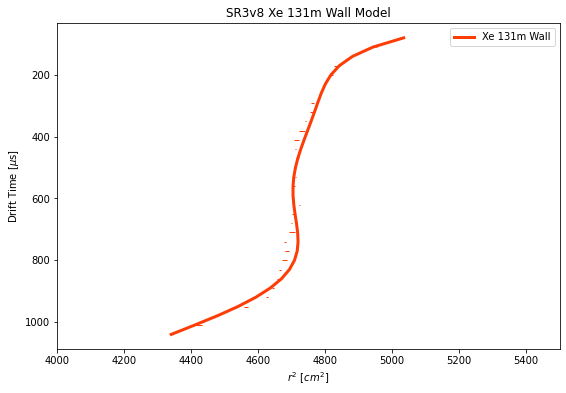

In [8]:
# plotting Xe 131m wall 

# Set up the figure and axes for subplots
fig, ax1 = plt.subplots(figsize=(9, 6))

# set the number of bins and range for drift time vs r2
num_bins = 200
plot_range = [[0.,7000.], [0.,1100.]]

# access variables

# data selections 
r2_1 = r2_Xe131m_points
d_r2_1 = d_r2_Xe131m_points # uncertainty in r2
dT_1 = dT_Xe131m_points
# wall fit
r2_fit_1 = r2_cm2_fit_Xe131m
dT_fit_1 = dT_us_fit_Xe131m
# drift time mask 
dT_lim_mask_1 = (dT_fit_1 > min_dT) & (dT_fit_1 < max_dT)
# limit data with mask 
r2_fit_lim_1 = r2_fit_1[dT_lim_mask_1]
dT_fit_lim_1 = dT_fit_1[dT_lim_mask_1]

# variables to plot 
r2_fit_1 = r2_fit_lim_1
dT_fit_1 = dT_fit_lim_1

# # drift time vs. r^2
# hist_r2_dT_1 = ax1.hist2d(r2_1, dT_1, bins = num_bins, range = plot_range, cmin=1, alpha = 1)
# # Add colorbars to the plot
# cbar = fig.colorbar(hist_r2_dT_1[3], ax=ax1)

# Plot the wall position
plt.plot(r2_fit_1, dT_fit_1, linewidth=3, color="xkcd:red orange", label='Xe 131m Wall')

# plot points
plt.errorbar(r2_1, dT_1, xerr = d_r2_1, capsize=0, ls='none', color="xkcd:red orange", elinewidth=1)

# Add labels
ax1.set_xlabel('$r^2$ [${cm}^2$]')
ax1.set_ylabel('Drift Time [$\mu$s]')
ax1.set_title('SR3v8 Xe 131m Wall Model')
ax1.set_xlim(4000,5500)
plt.legend()

# flip y-axis
plt.gca().invert_yaxis()

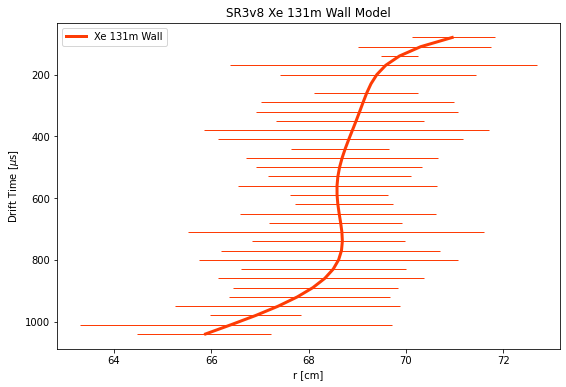

In [9]:
# plotting Xe 131m wall 

# Set up the figure and axes for subplots
fig, ax1 = plt.subplots(figsize=(9, 6))

# set the number of bins and range for drift time vs r2
num_bins = 200
plot_range = [[0.,7000.], [0.,1100.]]

# access variables

# data selections 
r_1 = np.sqrt(r2_1)
d_r_1 = np.sqrt(d_r2_1)
dT_1 = dT_Xe131m_points
# wall fit
r_fit_1 = np.sqrt(r2_fit_1)
dT_fit_1 = dT_us_fit_Xe131m
# drift time mask 
dT_lim_mask_1 = (dT_fit_1 > min_dT) & (dT_fit_1 < max_dT)
# limit data with mask 
r_fit_lim_1 = np.sqrt(r2_fit_lim_1)
dT_fit_lim_1 = dT_fit_1[dT_lim_mask_1]

# variables to plot 
r_fit_1 = np.sqrt(r2_fit_1)
dT_fit_1 = dT_fit_lim_1

# Plot the wall position
plt.plot(r_fit_1, dT_fit_1, linewidth=3, color="xkcd:red orange", label='Xe 131m Wall')

# plot points
plt.errorbar(r_1, dT_1, xerr = d_r_1, capsize=0, ls='none', color="xkcd:red orange", elinewidth=1)

# Add labels
ax1.set_xlabel('r [cm]')
ax1.set_ylabel('Drift Time [$\mu$s]')
ax1.set_title('SR3v8 Xe 131m Wall Model')
#ax1.set_xlim(4000,5500)
plt.legend()

# flip y-axis
plt.gca().invert_yaxis()

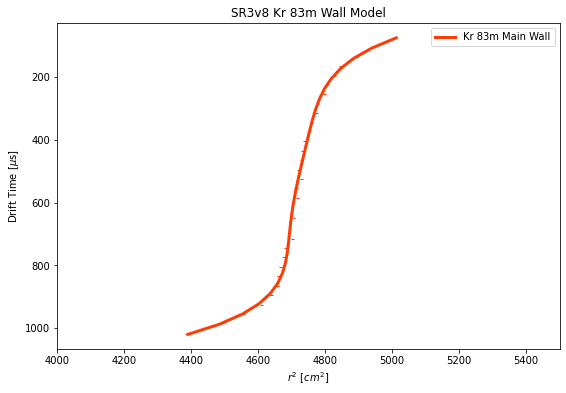

In [10]:
# plotting Kr 83m main wall 

# Set up the figure and axes for subplots
fig, ax1 = plt.subplots(figsize=(9, 6))

# set the number of bins and range for drift time vs r2
num_bins = 200
plot_range = [[0.,7000.], [0.,1100.]]

# access variables

#data selections 
dT_2 = dT_Kr83m_points
r2_2 = r2_Kr83m_points
d_r2_2 = d_r2_Kr83m_points
# wall fit
r2_fit_2 = r2_cm2_fit_Kr83m
dT_fit_2 = dT_us_fit_Kr83m
# drift time mask 
dT_lim_mask_2 = (dT_fit_2 > min_dT) & (dT_fit_2 < max_dT)
# limit data with mask
r2_fit_lim_2 = r2_fit_2[dT_lim_mask_2]
dT_fit_lim_2 = dT_fit_2[dT_lim_mask_2]

# variables to plot 
r2_fit_2 = r2_fit_lim_2
dT_fit_2 = dT_fit_lim_2

# Plot the wall position
plt.plot(r2_fit_2, dT_fit_2, linewidth=3, color="xkcd:red orange", label='Kr 83m Main Wall')

# plot points
plt.errorbar(r2_2, dT_2, xerr = d_r2_2, capsize=0, ls='none', color="xkcd:red orange", elinewidth=1)

# Add labels
ax1.set_xlabel('$r^2$ [${cm}^2$]')
ax1.set_ylabel('Drift Time [$\mu$s]')
ax1.set_title('SR3v8 Kr 83m Wall Model')
ax1.set_xlim(4000,5500)
plt.legend()

# flip y-axis
plt.gca().invert_yaxis()

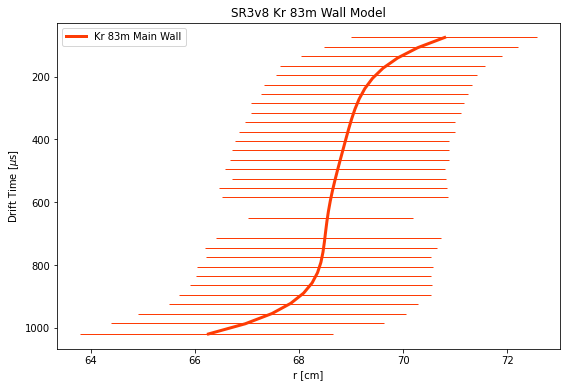

In [11]:
# plotting Kr 83m main wall 

# Set up the figure and axes for subplots
fig, ax1 = plt.subplots(figsize=(9, 6))

# set the number of bins and range for drift time vs r2
num_bins = 200
plot_range = [[0.,7000.], [0.,1100.]]

# access variables

#data selections 
dT_2 = dT_Kr83m_points
r_2 = np.sqrt(r2_2)
d_r_2 = np.sqrt(d_r2_2)
# wall fit
r_fit_2 = np.sqrt(r2_fit_2)
dT_fit_2 = dT_us_fit_Kr83m
# drift time mask 
dT_lim_mask_2 = (dT_fit_2 > min_dT) & (dT_fit_2 < max_dT)
# limit data with mask
r_fit_lim_2 = np.sqrt(r2_fit_lim_2)
dT_fit_lim_2 = dT_fit_2[dT_lim_mask_2]

# variables to plot 
r_fit_2 = np.sqrt(r2_fit_2)
dT_fit_2 = dT_fit_lim_2

# Plot the wall position
plt.plot(r_fit_2, dT_fit_2, linewidth=3, color="xkcd:red orange", label='Kr 83m Main Wall')

# plot points
plt.errorbar(r_2, dT_2, xerr = d_r_2, capsize=0, ls='none', color="xkcd:red orange", elinewidth=1)

# Add labels
ax1.set_xlabel('r [cm]')
ax1.set_ylabel('Drift Time [$\mu$s]')
ax1.set_title('SR3v8 Kr 83m Wall Model')
# ax1.set_xlim(4000,5500)
plt.legend()

# flip y-axis
plt.gca().invert_yaxis()

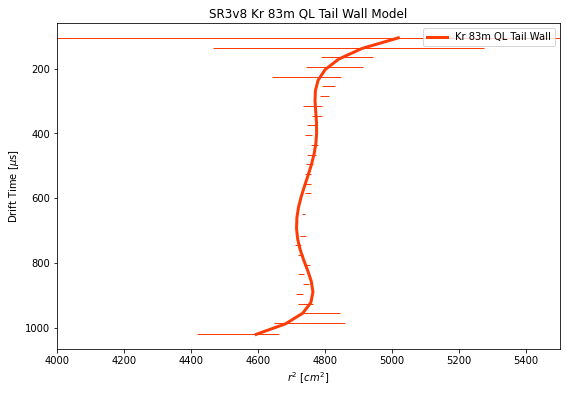

In [12]:
# plotting Kr 83m QL tail wall 

# Set up the figure and axes for subplots
fig, ax1 = plt.subplots(figsize=(9, 6))

# set the number of bins and range for drift time vs r2
num_bins = 200
plot_range = [[0.,7000.], [0.,1100.]]

# access variables

# data selections 
r2_3 = r2_Kr83m_points_QL
d_r2_3 = d_r2_Kr83m_points_QL # uncertainty in r2
dT_3 = dT_Kr83m_points_QL
# wall fit
r2_fit_3 = r2_cm2_fit_Kr83m_QL
dT_fit_3 = dT_us_fit_Kr83m_QL
# drift time mask 
dT_lim_mask_3 = (dT_fit_3 > min_dT) & (dT_fit_3 < max_dT)
# limit data with mask 
r2_fit_lim_3 = r2_fit_3[dT_lim_mask_3]
dT_fit_lim_3 = dT_fit_3[dT_lim_mask_3]

# variables to plot 
r2_fit_3 = r2_fit_lim_3
dT_fit_3 = dT_fit_lim_3

# # drift time vs. r^2
# hist_r2_dT_3 = ax1.hist2d(r2_3, dT_3, bins = num_bins, range = plot_range, cmin=1, alpha = 1)
# # Add colorbars to the plot
# cbar = fig.colorbar(hist_r2_dT_3[3], ax=ax1)

# Plot the wall position
plt.plot(r2_fit_3, dT_fit_3, linewidth=3, color="xkcd:red orange", label='Kr 83m QL Tail Wall')

# plot points
plt.errorbar(r2_3, dT_3, xerr = d_r2_3, capsize=0, ls='none', color="xkcd:red orange", elinewidth=1)

# Add labels
ax1.set_xlabel('$r^2$ [${cm}^2$]')
ax1.set_ylabel('Drift Time [$\mu$s]')
ax1.set_title('SR3v8 Kr 83m QL Tail Wall Model')
ax1.set_xlim(4000,5500)
plt.legend()

# flip y-axis
plt.gca().invert_yaxis()

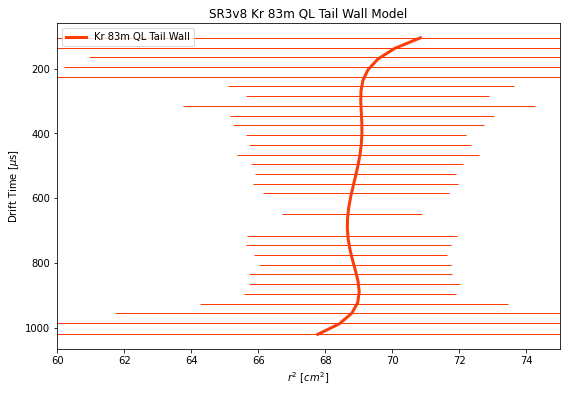

In [13]:
# plotting Kr 83m QL tail wall 

# Set up the figure and axes for subplots
fig, ax1 = plt.subplots(figsize=(9, 6))

# set the number of bins and range for drift time vs r2
num_bins = 200
plot_range = [[0.,7000.], [0.,1100.]]

# access variables

# data selections 
r_3 = np.sqrt(r2_3)
d_r_3 = np.sqrt(d_r2_3)
dT_3 = dT_Kr83m_points_QL
# wall fit
r_fit_3 = np.sqrt(r2_fit_3)
dT_fit_3 = dT_us_fit_Kr83m_QL
# drift time mask 
dT_lim_mask_3 = (dT_fit_3 > min_dT) & (dT_fit_3 < max_dT)
# limit data with mask 
r_fit_lim_3 = np.sqrt(r2_fit_lim_3)
dT_fit_lim_3 = dT_fit_3[dT_lim_mask_3]

# variables to plot 
r_fit_3 = np.sqrt(r2_fit_3)
dT_fit_3 = dT_fit_lim_3

# Plot the wall position
plt.plot(r_fit_3, dT_fit_3, linewidth=3, color="xkcd:red orange", label='Kr 83m QL Tail Wall')

# plot points
plt.errorbar(r_3, dT_3, xerr = d_r_3, capsize=0, ls='none', color="xkcd:red orange", elinewidth=1)

# Add labels
ax1.set_xlabel('$r^2$ [${cm}^2$]')
ax1.set_ylabel('Drift Time [$\mu$s]')
ax1.set_title('SR3v8 Kr 83m QL Tail Wall Model')
ax1.set_xlim(60,75)
plt.legend()

# flip y-axis
plt.gca().invert_yaxis()

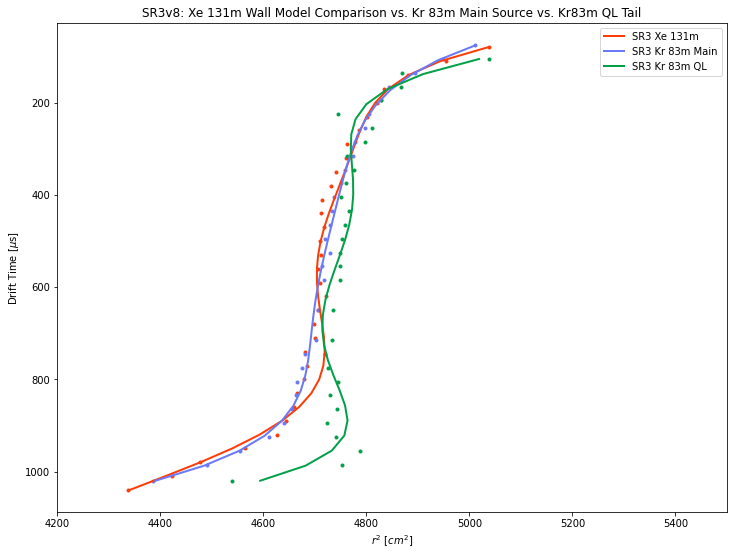

In [14]:
# wall model comparison 

# Set up the figure and axes for subplots
fig, ax = plt.subplots(figsize=(12, 9))

# Plot the wall position 

# Xe 131m
plt.plot(r2_fit_1, dT_fit_1, linewidth=2, color="xkcd:red orange", label='SR3 Xe 131m')
# plt.errorbar(r2_1, dT_1, xerr = d_r2_1, capsize=0, ls='none', color="xkcd:red orange", elinewidth=1)
plt.scatter(r2_1, dT_1, marker=".", color="xkcd:red orange")

# Kr 83m Main 
plt.plot(r2_fit_2, dT_fit_2, linewidth=2, color="xkcd:cornflower", label='SR3 Kr 83m Main')
# plt.scatter(r2_2, dT_2, marker=2, color="xkcd:cornflower")
plt.scatter(r2_2, dT_2, marker=".", color="xkcd:cornflower")

# Kr 83m QL
plt.plot(r2_fit_3, dT_fit_3, linewidth=2, color="xkcd:emerald", label='SR3 Kr 83m QL')
# plt.errorbar(r2_3, dT_3, xerr = d_r2_3, capsize=0, ls='none', color="xkcd:emerald", elinewidth=1)
plt.scatter(r2_3, dT_3, marker=".", color="xkcd:emerald")

# Add labels
ax.set_xlabel('$r^2$ [${cm}^2$]')
ax.set_ylabel('Drift Time [$\mu$s]')
ax.set_title('SR3v8: Xe 131m Wall Model Comparison vs. Kr 83m Main Source vs. Kr83m QL Tail')
ax.set_xlim(4200,5500)
plt.legend()

# flip y-axis
plt.gca().invert_yaxis()

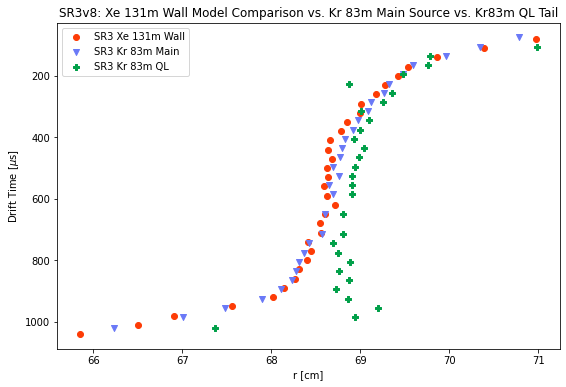

In [15]:
# wall model comparison 

# Set up the figure and axes for subplots
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the wall position 

# Xe 131m
# plt.plot(r_fit_1, dT_fit_1, linewidth=3, color="xkcd:red orange")
plt.scatter(r_1, dT_1, marker="o", color="xkcd:red orange", label='SR3 Xe 131m Wall')

# Kr 83m Main 
# plt.plot(r_fit_2, dT_fit_2, linewidth=2, color="xkcd:cornflower")
plt.scatter(r_2, dT_2, marker="v", color="xkcd:cornflower", label='SR3 Kr 83m Main')

# Kr 83m QL
# plt.plot(r_fit_3, dT_fit_3, linewidth=2, color="xkcd:emerald")
plt.scatter(r_3, dT_3, marker="P", color="xkcd:emerald", label='SR3 Kr 83m QL')

# Add labels
ax.set_xlabel('r [cm]')
ax.set_ylabel('Drift Time [$\mu$s]')
ax.set_title('SR3v8: Xe 131m Wall Model Comparison vs. Kr 83m Main Source vs. Kr83m QL Tail')
# ax.set_xlim(4200,5500)
plt.legend()

# flip y-axis
plt.gca().invert_yaxis()

In [40]:
# plot using r instead of r2, no point in r2 if we're just comparing distances

# get chi squared between the data points and the curves
# plot chi-square as a function of the poly order
# if it gets too small then we're overfitting